# Visual Principles
Covers: matplotlib Plotting, Counter class

## Line charts
Use case: Showing Trends

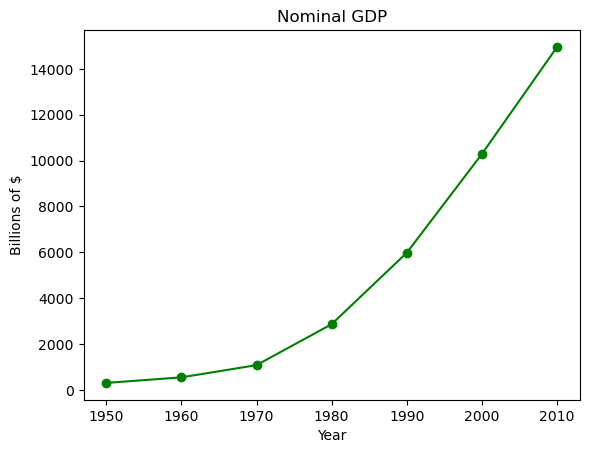

In [1]:
from matplotlib import pyplot as plt
#Sample Dataset
years = [1950, 1960, 1970, 1980, 1990, 2000, 2010]
gdp = [300.2, 543.3, 1075.9, 2862.5, 5979.6, 10289.7, 14958.3]

# Create a line chart with x=years, y=gdp
plt.plot(years, gdp, color='green', marker='o', linestyle='solid')
# Adding necessary attributres, such as titles and ylabels
plt.title("Nominal GDP")
plt.xlabel("Year")
plt.ylabel("Billions of $")
# Showing the plot
plt.show()

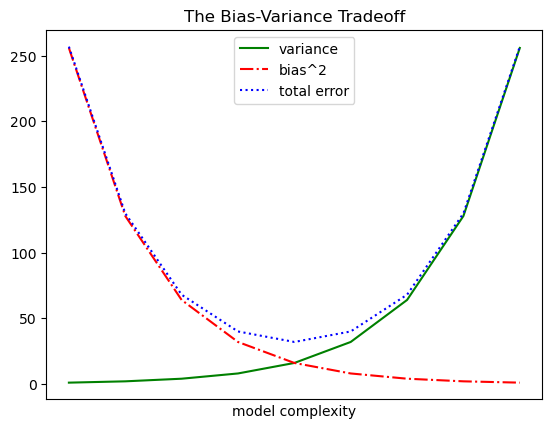

In [2]:
'''-- MORE ADVANCED LINE CHART EXAMPLE --''' 
variance     = [1, 2, 4, 8, 16, 32, 64, 128, 256]
bias_squared = [256, 128, 64, 32, 16, 8, 4, 2, 1]
# https://www.geeksforgeeks.org/zip-in-python/
total_error = [x + y for x, y in zip(variance, bias_squared)]
# https://www.geeksforgeeks.org/enumerate-in-python/
xs = [i for i, _ in enumerate(variance)]
# Plotting multiple lines on chart
plt.plot(xs, variance, 'g-',  label='variance') # green solid line
plt.plot(xs, bias_squared, 'r-.', label='bias^2') # red dot-dashed line
plt.plot(xs, total_error, 'b:',  label='total error') # blue dotted line
# Adding chart attributes
plt.legend(loc=9) # Adding legend to "top center", which we can do since we defined labels
plt.xlabel("model complexity")
plt.xticks([])
plt.title("The Bias-Variance Tradeoff")
plt.show()

## Bar Charts
Use Case: Showing how Quantity varies among discrete values

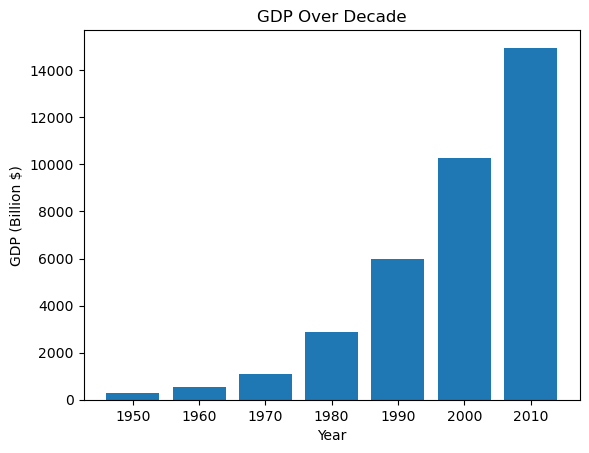

In [3]:
# Plot bars with x-codinates [0, 1, 2,...]
plt.bar(range(len(years)), gdp)
# Setting attributes
plt.title("GDP Over Decade")
plt.ylabel("GDP (Billion $)")
plt.xlabel("Year")
# Customizing x-ticks with year at bar centers
plt.xticks(range(len(years)), years)
# Showing the plot
plt.show()

## Counter class
Elements are stored in dictionary, with keys and values

In [4]:
from collections import Counter
# Creating counts object (dictionary)
counts = Counter([1,2,3,4,3,2,3,1,2,1,1,2,3,2]) # Can be any array

# Getting the keys
print(counts.keys())
# Getting the values (counts)
print(counts.values())
# Get items from counts in list of tuples
print(counts.items())

# Sorted and len() functions
sorted([1,2,3,4,3,2,3,1,2,1,1,2,3,2]) # Returns sorted list
len([1,2,3,4,3,2,3,1,2,1,1,2,3,2])  # Returns len

dict_keys([1, 2, 3, 4])
dict_values([4, 5, 4, 1])
dict_items([(1, 4), (2, 5), (3, 4), (4, 1)])


14

#### Counter Class w/ Barchart Example

Counter({80: 4, 90: 3, 70: 3, 0: 2, 60: 1})


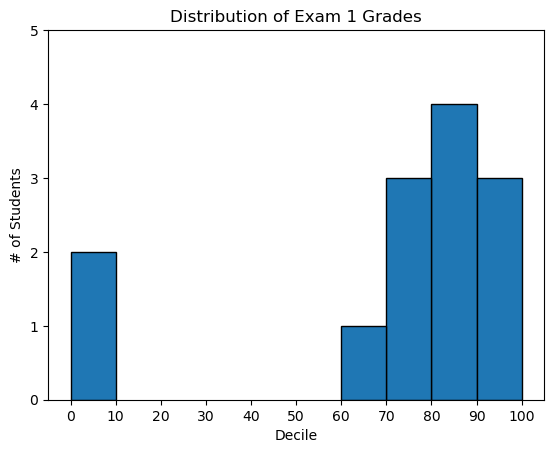

In [5]:
from collections import Counter
grades = [83, 95, 91, 87, 70, 0, 85, 82, 100, 67, 73, 77, 0]

# Bucket grades by decile, putting 100 with 90s
histogram = Counter(min(grade // 10 * 10, 90) for grade in grades)
print(histogram)

# Create bar chart, shifting bars right by 5
plt.bar([x + 5 for x in histogram.keys()], # x-values
        histogram.values(),  # y-values
        10,  # Bar width
        edgecolor=(0, 0, 0))  # Set edges to black

# Set the bar axis
plt.axis([-5, 105, 0, 5])  # x-min, x-max, y-min, y-max

# Add attributes
plt.xticks([10 * i for i in range(11)])  # x-labels 0-100
plt.xlabel("Decile")
plt.ylabel("# of Students")
plt.title("Distribution of Exam 1 Grades")
plt.show()  # Show the plot

## Scatterplots
Good for showing the relationship between two paired sets of data

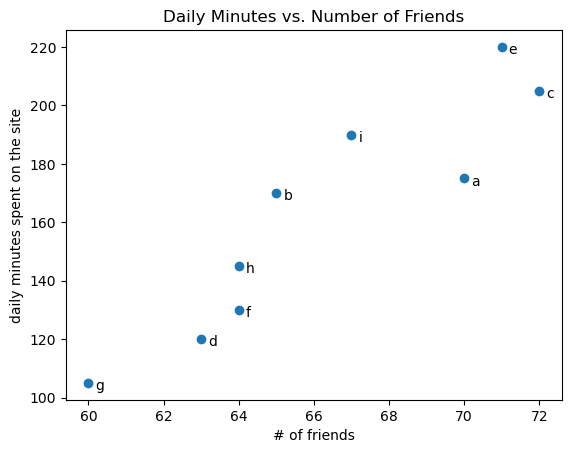

In [6]:
# Sample data
friends = [ 70,  65,  72,  63,  71,  64,  60,  64,  67]
minutes = [175, 170, 205, 120, 220, 130, 105, 145, 190]
labels =  ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']

plt.scatter(friends, minutes) 

# Labeling each point
for label, friend_count, minute_count in zip(labels, friends, minutes):
    plt.annotate(label,
                 xy=(friend_count, minute_count), # Put label with point
                 xytext=(5, -5),  # Slightly offset
                 textcoords='offset points')
# Other graph attributes
plt.title("Daily Minutes vs. Number of Friends")
plt.xlabel("# of friends")
plt.ylabel("daily minutes spent on the site")
plt.show()

## Subplot
Plotting multiple plots on one graph. Example below

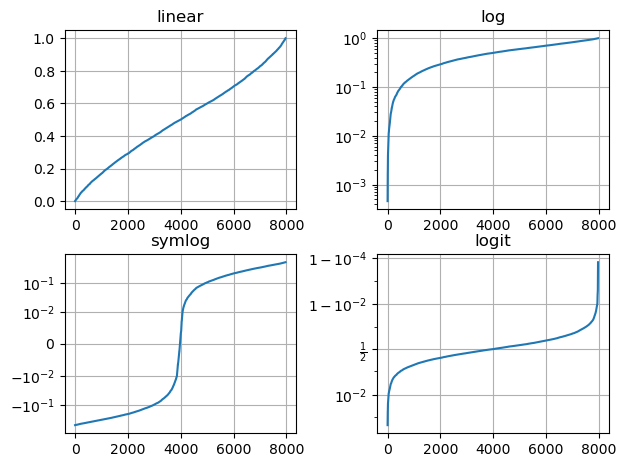

In [7]:
# Making up data
import numpy as np
np.random.seed(6969420)  # Fixing for reproducibility
y = np.random.normal(loc=.5, scale=.4, size=10000)
y = y[(y > 0) & (y < 1)]  # Fixing within 0-1
y.sort()
x = np.arange(len(y))

# Plot with various axes scales
plt.figure()

# linear
plt.subplot(2, 2, 1)  # 2x2 plots, position 1
plt.plot(x, y)
plt.yscale('linear')  # Distance between ticks are linear
plt.title('linear')
plt.grid(True)

# log - usesful for data over several orders of magnitude
plt.subplot(222)  # Equivalent (2, 2, 2)
plt.plot(x, y)
plt.yscale('log')
plt.title('log')
plt.grid(True)

# symmetric log - log but useful for negatives
plt.subplot(2, 2, 3)
plt.plot(x, y - y.mean())
plt.yscale('symlog', linthresh=0.01)
plt.title('symlog')
plt.grid(True)

# logit - useful for probabilities, highlights tail
plt.subplot(224)
plt.plot(x, y)
plt.yscale('logit')
plt.title('logit')
plt.grid(True)

# Adjust the subplot layout
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, 
                    hspace=0.25, wspace=0.35)
plt.show()
